In [29]:
'''
slightly modified by QZhu
Method to take two equally-sized lists and return just the elements which lie 
on the Pareto frontier, sorted into order.
Default behaviour is to find the maximum for both X and Y, but the option is
available to specify maxX = False or maxY = False to find the minimum for either
or both of the parameters.
'''
def pareto_frontier(Xs, Ys, maxX = True, maxY = True):
# Sort the list in either ascending or descending order of X
    myList = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxX)
# Start the Pareto frontier with the first value in the sorted list
    p_front = [myList[0]]    
    ids = [0]
# Loop through the sorted list
    for i, pair in enumerate(myList[1:]):
        if maxY: 
            if pair[1] >= p_front[-1][1]: # Look for higher values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
                ids.append(i+1)
        else:
            if pair[1] <= p_front[-1][1]: # Look for lower values of Y…
                p_front.append(pair) # … and add them to the Pareto frontier
                ids.append(i+1)

    myList = np.delete(myList, ids, axis=0)


    return myList, np.array(p_front)

In [30]:
XY0s = np.random.rand(50,2)
np.savetxt('1.txt', XY0s)

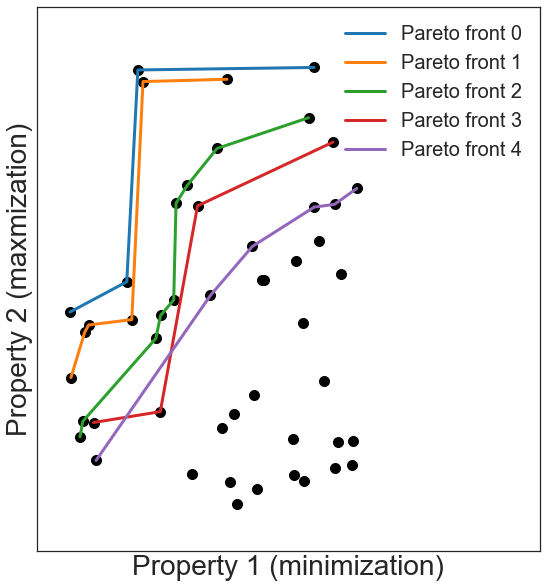

In [78]:
import matplotlib.pyplot as plt   
import numpy as np
#from copy import deepcopy 
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(9,10))
XYs = np.loadtxt('1.txt')
plt.scatter(XYs[:,0], XYs[:,1], c='black', s= 100)

# Plot a scatter graph of all results
# Find lowest values for cost and highest for savings
for i in range(5):
    Xs, Ys = XYs[:,0], XYs[:,1]
    newXYs, p_front = pareto_frontier(Xs, Ys, maxX = False, maxY = True) 
    plt.plot(p_front[:,0], p_front[:,1], label='Pareto front '+str(i), lw=3.0)
    XYs = newXYs
    #print(len(XYs))
plt.legend(fontsize=20, loc=1)
plt.xticks([])
plt.yticks([])
plt.xlabel('Property 1 (minimization)', fontsize=28)
plt.ylabel('Property 2 (maxmization)', fontsize=28)
plt.xlim([-0.1,1.6])
plt.ylim([-0.1,1.1])


plt.show()

In [131]:
XY0s = np.delete(XY0s, 1, axis=0)

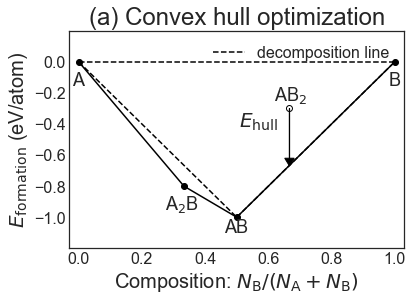

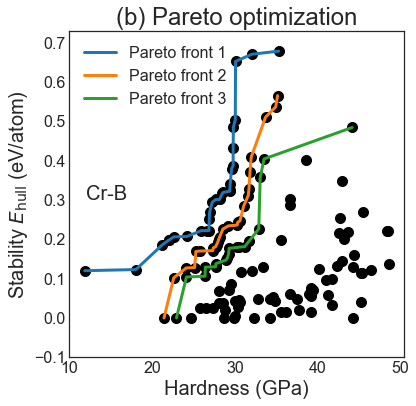

In [115]:
import matplotlib.pyplot as plt
from __future__ import unicode_literals
import matplotlib
#matplotlib.rcParams['text.usetex'] = True
plt.style.use('seaborn-white')

fig = plt.figure(figsize=(6,4))
plt.tick_params(labelsize=16)


A = [0, 0] # 
B = [1, 0] #
AB = [0.5, -1.0] #
AB2 = [0.667, -0.3]
A2B = [0.333, -0.8]

plt.title('(a) Convex hull optimization', fontsize=24)

plt.scatter(A[0], A[1], c='black')
plt.text(A[0]-0.02, A[1]-0.15, 'A',fontsize=18)

plt.scatter(B[0], B[1], c='black')
plt.text(B[0]-0.02, B[1]-0.15, 'B',fontsize=18)

plt.scatter(AB[0], AB[1], c='black')
plt.text(AB[0]-0.04, AB[1]-0.1, 'AB',fontsize=18)

plt.scatter(AB2[0], AB2[1], facecolors='none', edgecolors='k')
plt.text(AB2[0]-0.05, AB2[1]+0.05, 'AB$_2$',fontsize=18)


plt.scatter(A2B[0], A2B[1], c='black')
plt.text(A2B[0]-0.06, A2B[1]-0.15, 'A$_2$B', fontsize=18)

plt.plot([A[0],B[0]], [A[1],B[1]], 'k--', label='decomposition line')
plt.plot([AB[0],B[0]], [AB[1],B[1]], 'k--')
plt.plot([A[0],AB[0]], [A[1],AB[1]], 'k--')

plt.plot([A[0],A2B[0]], [A[1],A2B[1]], 'k-')
plt.plot([A2B[0],AB[0]], [A2B[1],AB[1]], 'k-')
plt.plot([AB[0],B[0]], [AB[1],B[1]], 'k-')

plt.ylabel('$E_{\mathsf{formation}}$ (eV/atom)', fontsize=20)
plt.xlabel('Composition: $N_{\mathsf{B}}/(N_{\mathsf{A}}+N_{\mathsf{B}})$', fontsize=20)

plt.arrow(AB2[0],AB2[1],dx=0, dy=-0.32, head_width=0.03, head_length=0.05, fc='k', ec='k')
plt.text(AB2[0]-0.16,AB2[1]-0.12,'$E_{\mathsf{hull}}$', fontsize=20)
#plt.yticks(np.arange(5), ('', 'Dick', 'Harry', 'Sally', 'Sue'))
plt.yticks(np.arange(-1, 0.2, step=0.2))

plt.xlim([-0.03,1.03])
plt.ylim([-1.20,0.20])
plt.legend(fontsize=16, loc=1)
#plt.show()

fig = plt.figure(figsize=(6,6))
plt.tick_params(labelsize=16)

plt.title('(b) Pareto optimization', fontsize=24)
XYs = np.loadtxt('Cr-B0.txt') #short list
plt.scatter(XYs[:,0], XYs[:,1], c='black', s= 100)
# Plot a scatter graph of all results
# Find lowest values for cost and highest for savings
for i in range(3):
    Xs, Ys = XYs[:,0], XYs[:,1]
    newXYs, p_front = pareto_frontier(Xs, Ys, maxX = False, maxY = True) 
    plt.plot(p_front[:,0], p_front[:,1], label='Pareto front '+str(i+1), lw=3.0)
    XYs = newXYs
plt.legend(fontsize=16, loc=2)

plt.ylabel('Stability $E_{\mathsf{hull}}$ (eV/atom)', fontsize=20)
plt.xlabel('Hardness (GPa)', fontsize=20)
plt.text(12, 0.3, 'Cr-B', fontsize=20)
plt.yticks(np.arange(-0.1, 0.8, step=0.1))


plt.show()

In [74]:
CrB1=np.loadtxt('Cr-B0.txt') #short list
CrB0=np.loadtxt('Cr-B.txt')  #full list
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(18,10))

ax1.set_ylabel('Stability $E_{hull}$ (eV/atom)', fontsize=20)
ax1.set_xlabel('Hardness (GPa)', fontsize=20)
ax1.set_title('Full list: '+ str(len(CrB0)), fontsize=20)
ax1.scatter(CrB0[:,0], CrB0[:,1])
ax1.set_ylim([0,0.5])
ax1.set_xlim([20,50])

ax2.set_xlabel('Hardness (GPa)', fontsize=20)
ax2.set_title('Short list: '+ str(len(CrB1)) + ' structures', fontsize=20)
ax2.scatter(CrB1[:,0], CrB1[:,1])
ax2.set_ylim([0,0.5])
ax2.set_xlim([20,50])

plt.show()